# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# <b> Data Description </b>

<b>Attribute Information: </b>

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**Connecting the drive**

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries**

In [ ]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [ ]:
#setting option to display all th ecolumns available
pd.set_option('display.max_columns', None)

In [ ]:
pip install --upgrade xlrd 

     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Loading the dataset**

In [ ]:
#loading the given dataset
data = pd.read_excel('/content/drive/MyDrive/Credit card defaulters/default of credit card clients.xls', header=1)
#first 5 rows of data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**we can see that the columns are wrongly named and the actual columns are in the first row of the dataset. So we have to raeplace the fisrt row as the feature names.**

In [ ]:
#renaming the columns in the dataset
data = pd.read_excel('/content/drive/MyDrive/Credit card defaulters/default of credit card clients.xls', 
                     names=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'])

**named the features and replaced it**

In [ ]:
#dropping the first row as it contains the columns name
data.drop(data.index[0:1], inplace=True)

**The first should be dropped as it contains the column names**

In [ ]:
#renaming the feature in the dataset which was wrongly named
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

**As the PAY_0 was wrongly named and is replaced as PAY_1**

In [ ]:
#printing the dataframe after all the changes
print('Default of Credit Card Clients:')
data.head()

Default of Credit Card Clients:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Actual columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#shape and of the dataset
data.shape

(30000, 25)

In [ ]:
#the number of unique values that each column contains
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# **Data Cleaning**

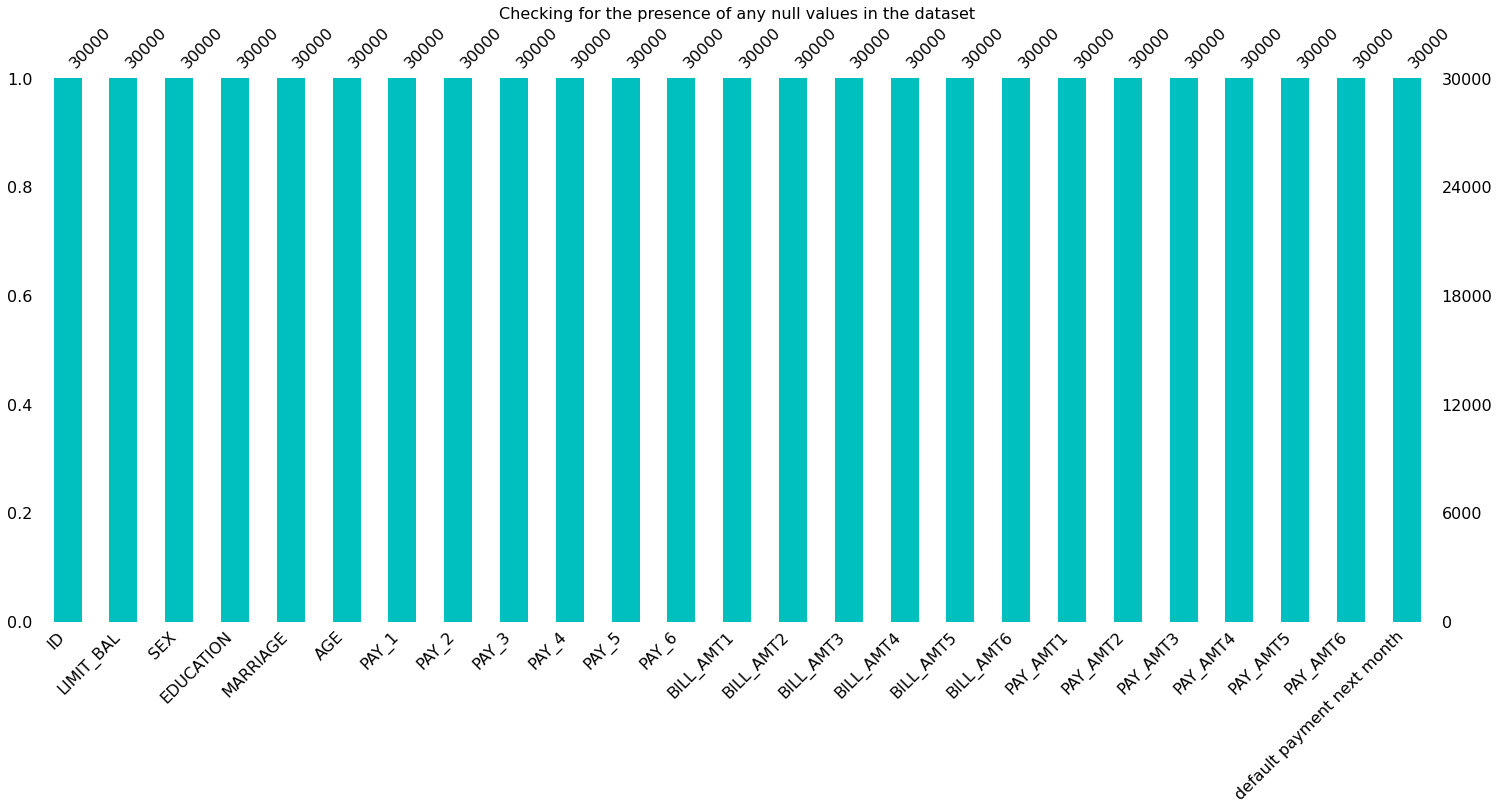

In [ ]:
#checking for nan values
msno.bar(data, color='c')
plt.title('Checking for the presence of any null values in the dataset', size=16)
plt.show()

* The above barplot shows that there are no null values present in the dataset

In [ ]:
#showin the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

# **Exploratory Data Analysis**

**Analysis of Limit Balance**

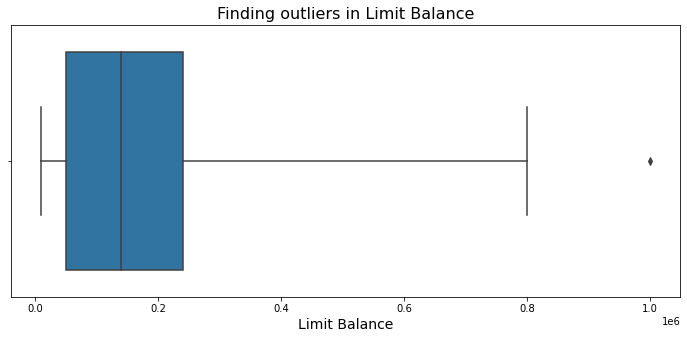

In [ ]:
#checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='LIMIT_BAL', whis=3)
plt.title('Finding outliers in Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()

In [ ]:
data['LIMIT_BAL'].describe()

count     30000
unique       81
top       50000
freq       3365
Name: LIMIT_BAL, dtype: int64

In [ ]:
data = data[data['LIMIT_BAL'] < 800000]
data.shape

(29997, 25)

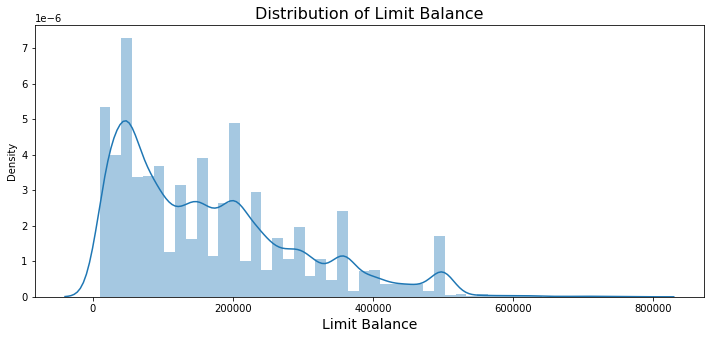

In [ ]:
#plotting the desity of the linit balance feature
plt.figure(figsize=(12,5))
sns.distplot(data['LIMIT_BAL'])
plt.title('Distribution of Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()

**Top Limit Balances**

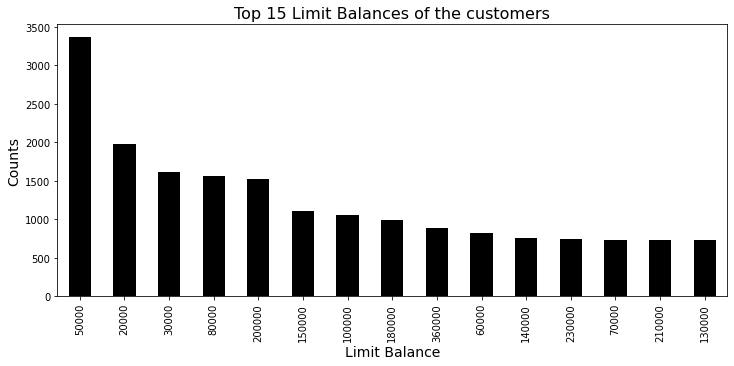

In [ ]:
#analysing the limit balance feature
limit = data['LIMIT_BAL'].value_counts().sort_values(ascending=False)

#plotting the top 15 limit balances
top_limit = limit.head(15)
top_limit.plot(kind='bar', figsize=(12, 5), color='k')
plt.title('Top 15 Limit Balances of the customers', size=16)
plt.xlabel('Limit Balance', size=14)
plt.ylabel('Counts', size=14)
plt.show()

**Least Limit Balances**

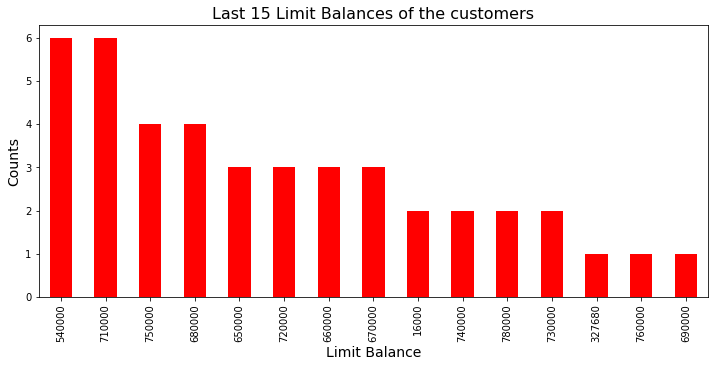

In [ ]:
#visualization of last 15 limit balances
least_limit = limit.tail(15)
least_limit.plot(kind='bar', figsize=(12, 5), color='r')
plt.title('Last 15 Limit Balances of the customers', size=16)
plt.xlabel('Limit Balance', size=14)
plt.ylabel('Counts', size=14)
plt.show()

In [ ]:
#selected few columns foe analysis
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

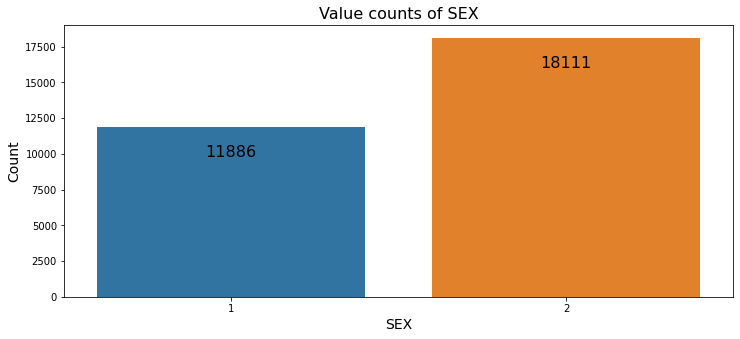

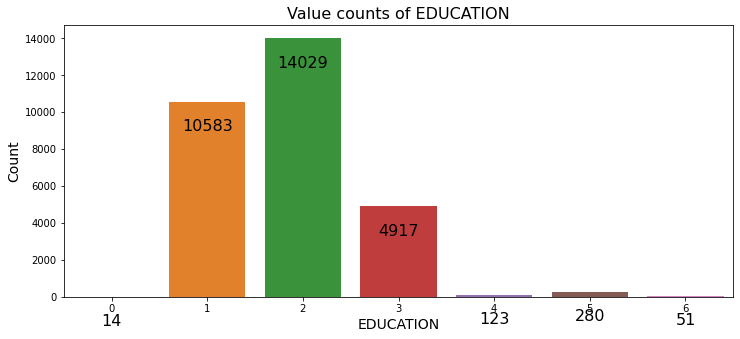

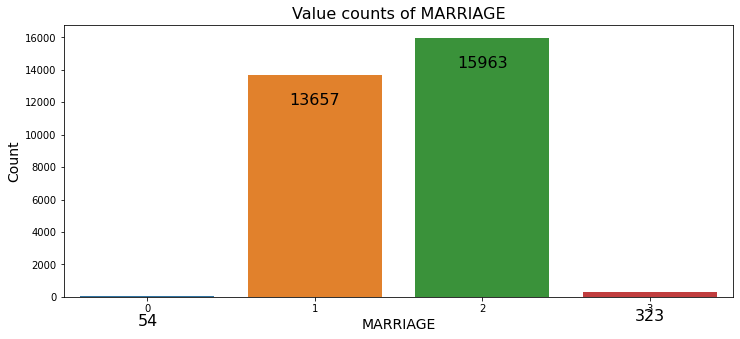

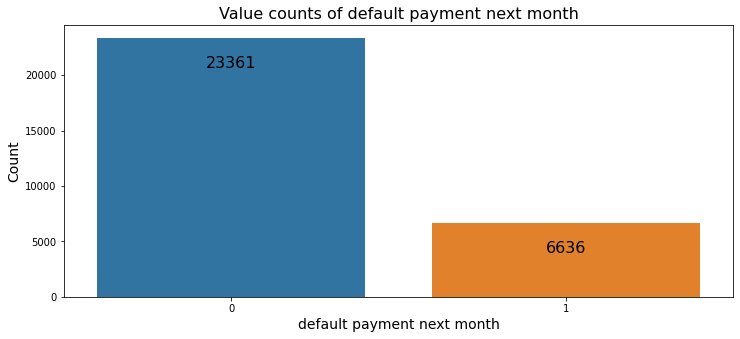

In [ ]:
#analysisng the categorical features
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    #plotting their value counts
    ch = sns.countplot(data[col], ax=ax)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), va = 'top', ha = 'center', size=16)
    plt.show()

* There dataset contains more than 50 female customers.

* Most of the Customers are from University level of education.

* It is assumed that 0 is for divorced customers. Unmarried i.e., sinle customers are more in number.


**Value Count of Age**

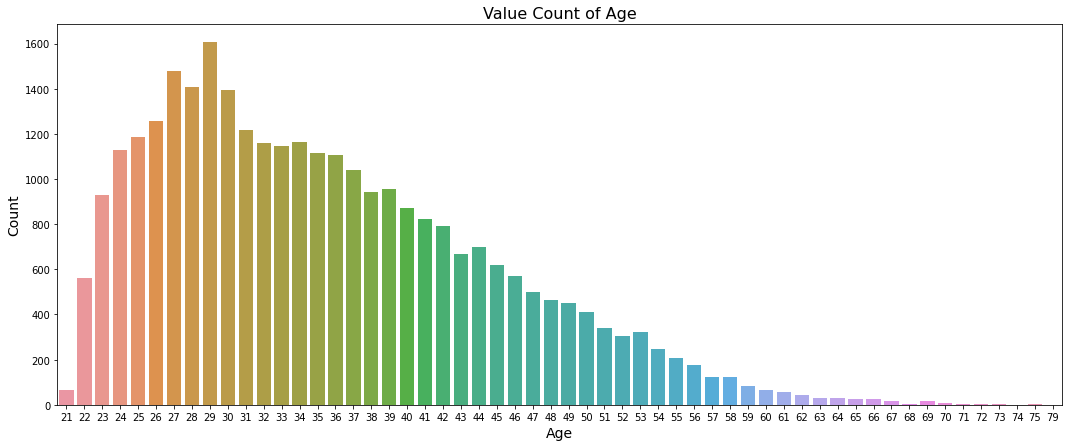

In [ ]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='AGE')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The dataset contains the customers from 21 to 79 age group. Customers of age group of 29 are more


**Age Vs Default Payment Next Month**

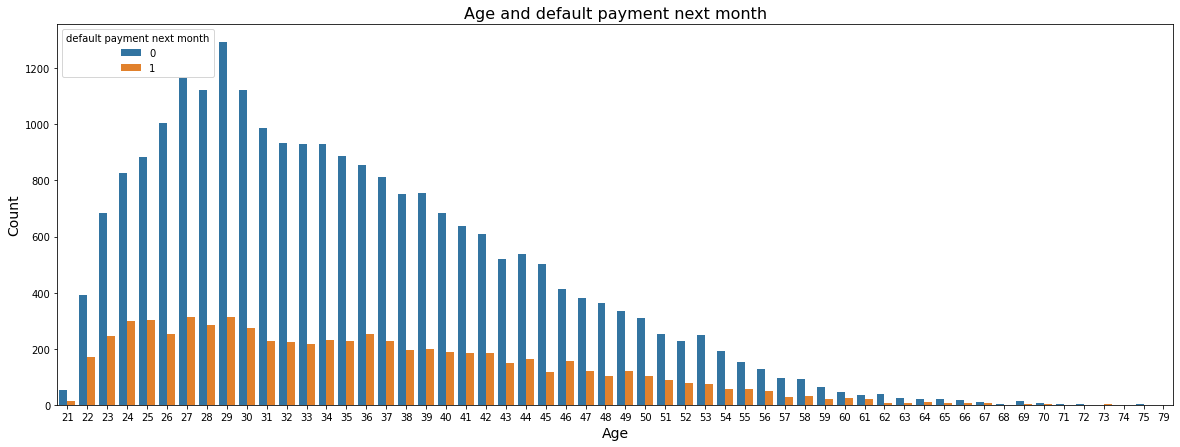

In [ ]:
#visualization of defaulters on the basis of age
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='AGE', hue='default payment next month')
plt.title('Age and default payment next month', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Education Vs Default Payment Next Month**

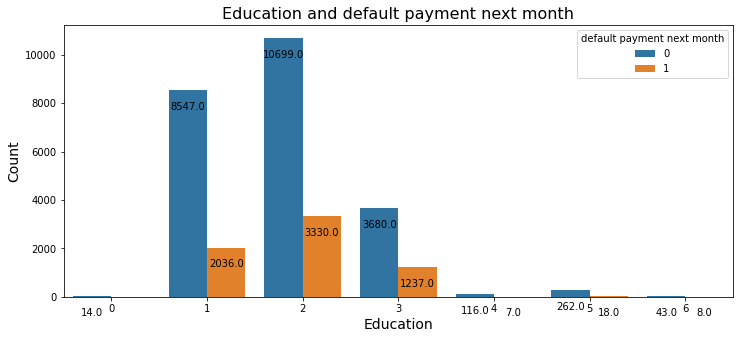

In [ ]:
#value counts of defaulters on the basis of education
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='EDUCATION')
#having counts on the specified bar
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.title('Education and default payment next month', size=16)
plt.xlabel('Education', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The university level educated people are mostly paying their dues on time and some among them are making delay in payments.

**Marriage Vs Default Payment Next Month**

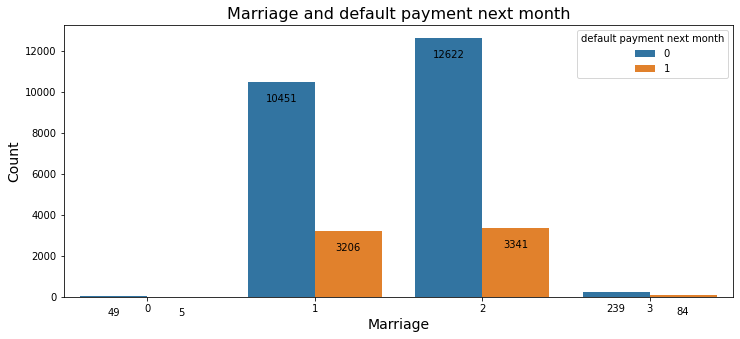

In [ ]:
#plotting the defaulters on the basis of marriage
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='MARRIAGE')
plt.title('Marriage and default payment next month', size=16)
plt.xlabel('Marriage', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.show()

**Sex Vs Default Payment Next Month**

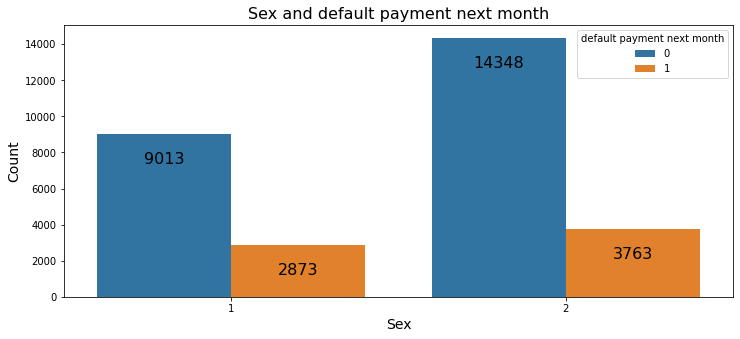

In [ ]:
#visualization of sex vs. defatult paument next month
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='SEX')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=16)
plt.show()

**Age Vs Default Payment Next Month**

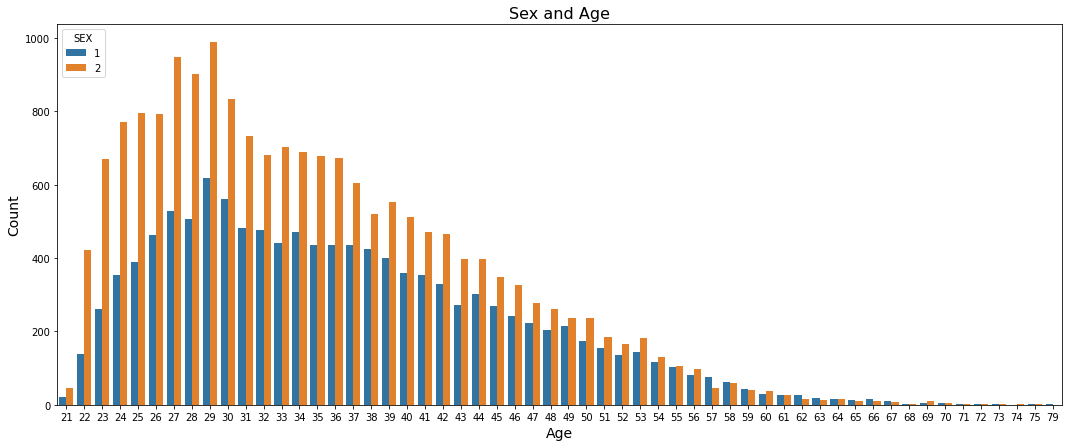

In [ ]:
#groupig age and differentiating the sex
age = data.groupby(['AGE', 'SEX']).agg({'SEX':sum})

#plotting the visualization
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='AGE', hue='SEX')
plt.title('Sex and Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In both male and female most of the customers are from the age group of 29.

**Pay Vs Default payment for next month**

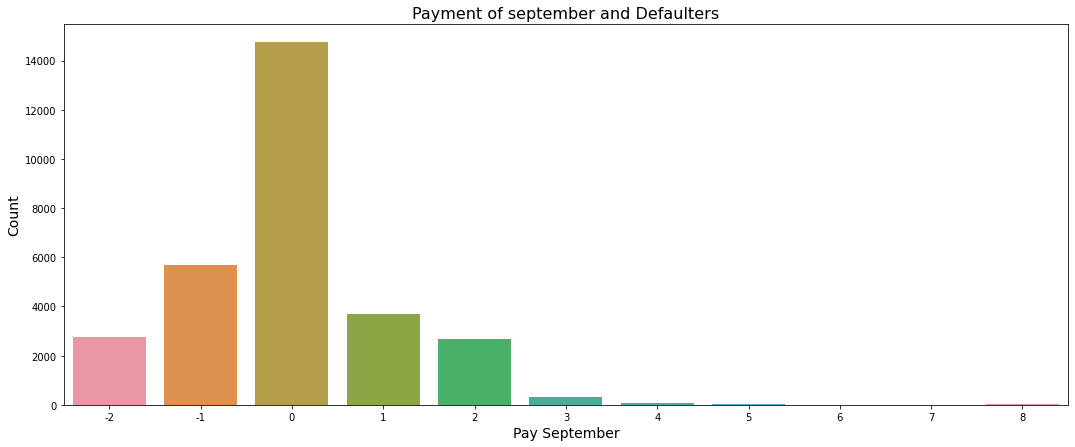

In [ ]:
#list of payment features in the datset
pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#Payment of september and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_1')
plt.title('Payment of september and Defaulters', size=16)
plt.xlabel('Pay September', size=14)
plt.ylabel('Count', size=14)
plt.show()

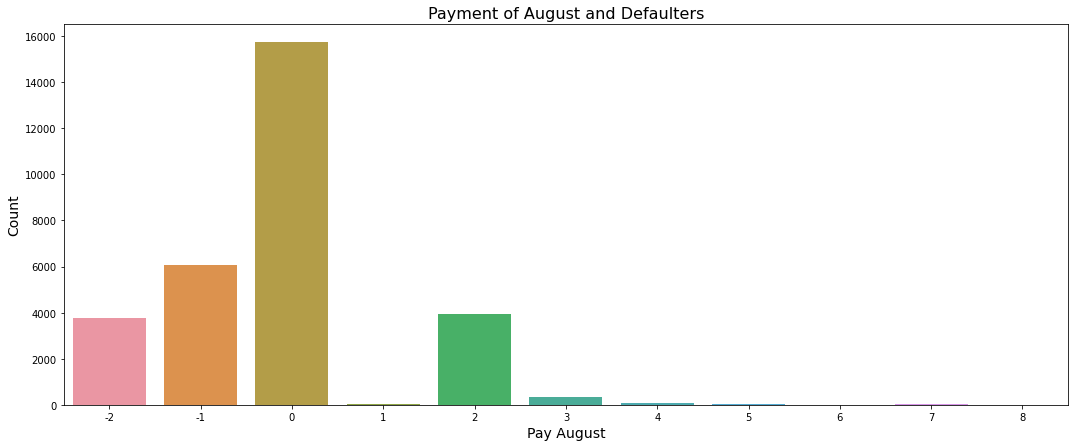

In [ ]:
#Payment of Augudt and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_2')
plt.title('Payment of August and Defaulters', size=16)
plt.xlabel('Pay August', size=14)
plt.ylabel('Count', size=14)
plt.show()

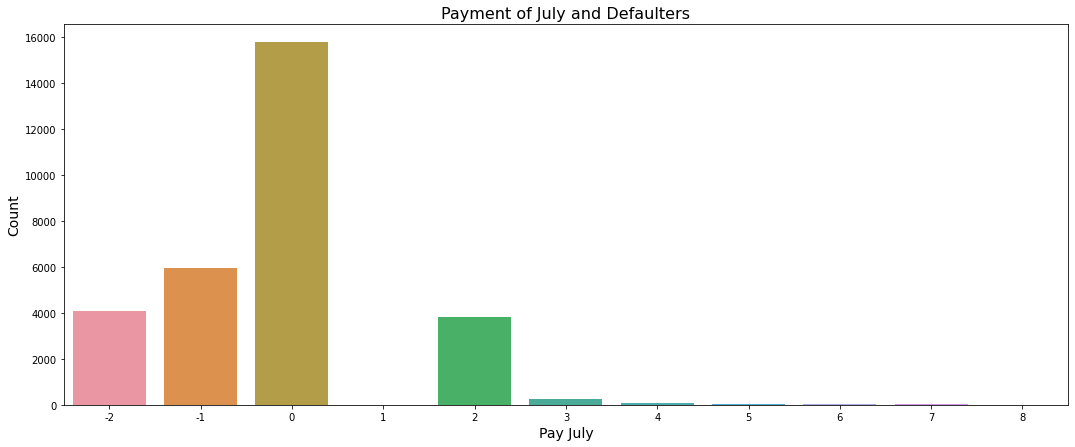

In [ ]:
#Payment of july and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_3')
plt.title('Payment of July and Defaulters', size=16)
plt.xlabel('Pay July', size=14)
plt.ylabel('Count', size=14)
plt.show()

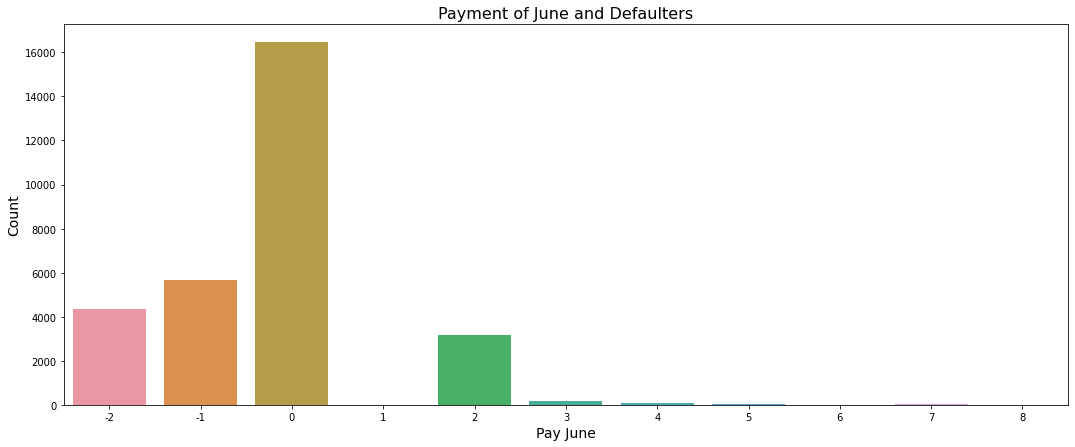

In [ ]:
#Payment of May and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_4')
plt.title('Payment of June and Defaulters', size=16)
plt.xlabel('Pay June', size=14)
plt.ylabel('Count', size=14)
plt.show()

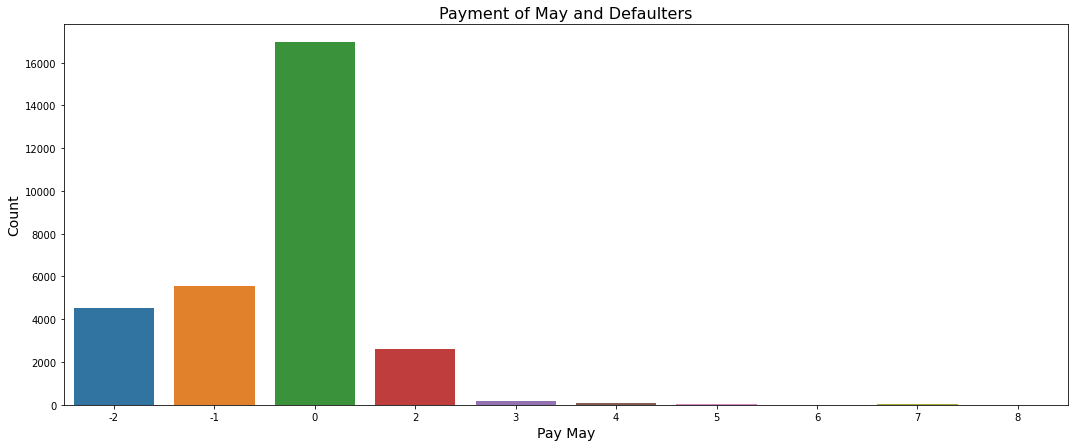

In [ ]:
#Payment of May and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_5')
plt.title('Payment of May and Defaulters', size=16)
plt.xlabel('Pay May', size=14)
plt.ylabel('Count', size=14)
plt.show()

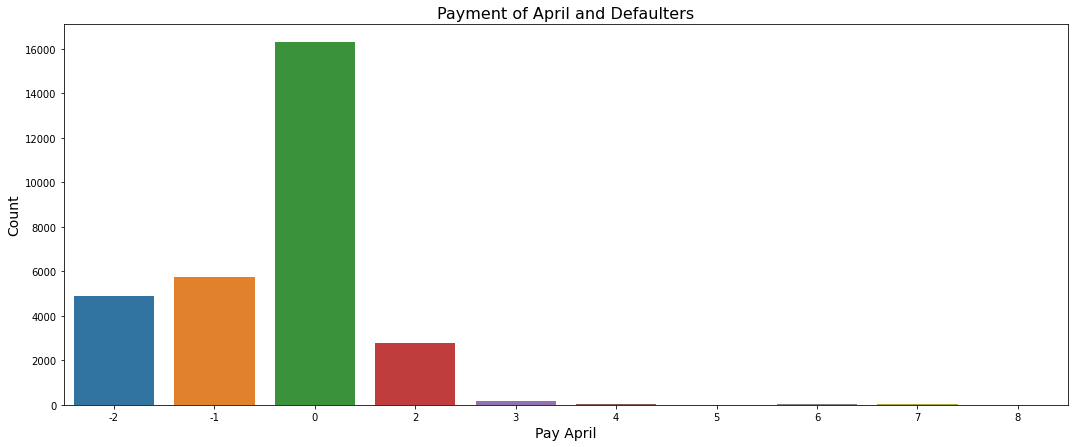

In [ ]:
#Payment of April and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_6')
plt.title('Payment of April and Defaulters', size=16)
plt.xlabel('Pay April', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Checking for outliers**

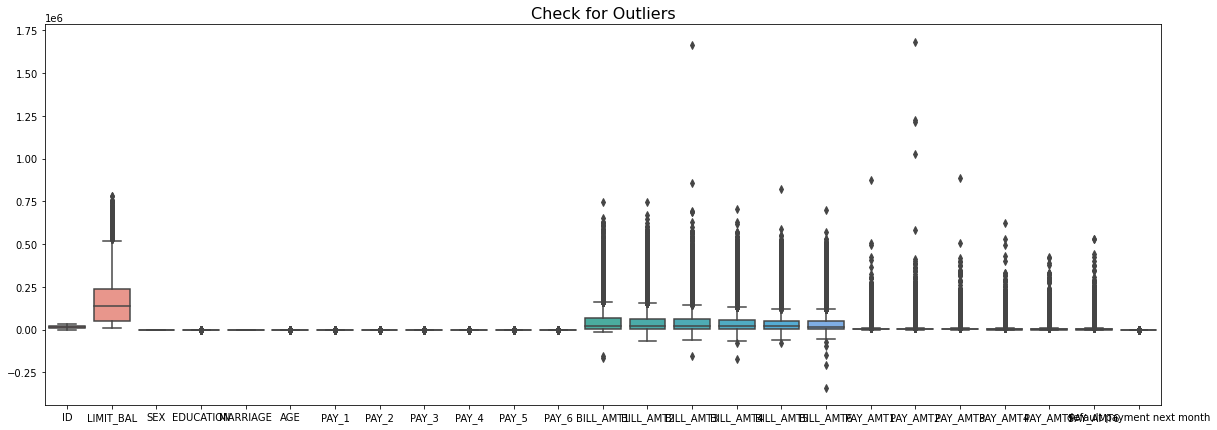

In [ ]:
#plotting the outlies in the dataset
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.title('Check for Outliers', size=16)
plt.show()

**Visualization of Bill Amount**

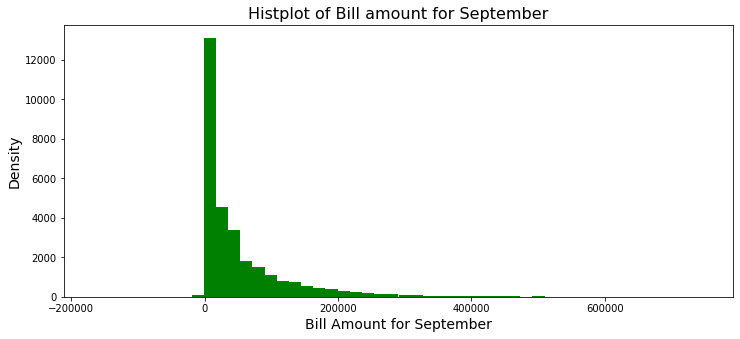

In [ ]:
#list of bill amounts available in the dataset
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

#Bill amount for September
plt.figure(figsize=(12,5))
data['BILL_AMT1'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for September', size=16)
plt.xlabel('Bill Amount for September', size=14)
plt.ylabel('Density', size=14)
plt.show()

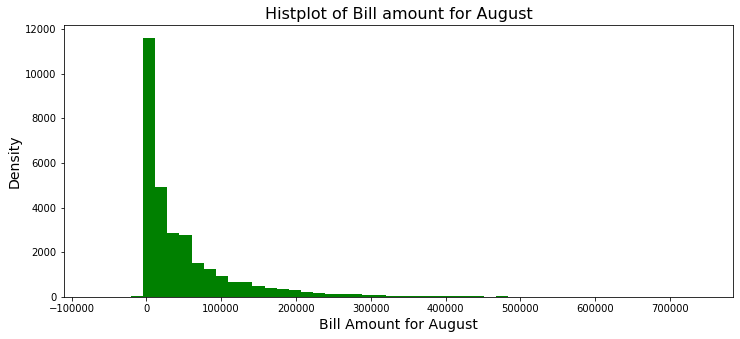

In [ ]:
#Bill amount for August
plt.figure(figsize=(12,5))
data['BILL_AMT2'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for August', size=16)
plt.xlabel('Bill Amount for August', size=14)
plt.ylabel('Density', size=14)
plt.show()

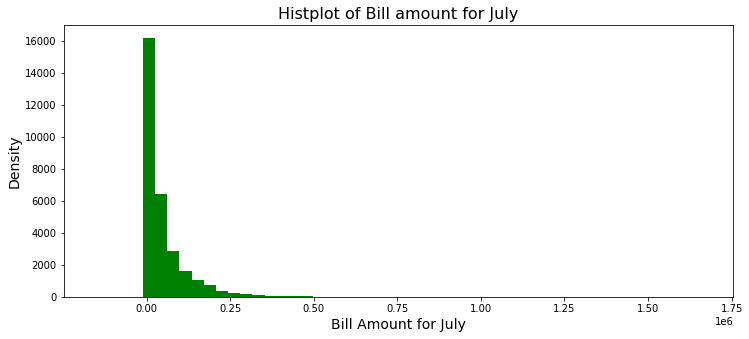

In [ ]:
#Bill amount for July
plt.figure(figsize=(12,5))
data['BILL_AMT3'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for July', size=16)
plt.xlabel('Bill Amount for July', size=14)
plt.ylabel('Density', size=14)
plt.show()

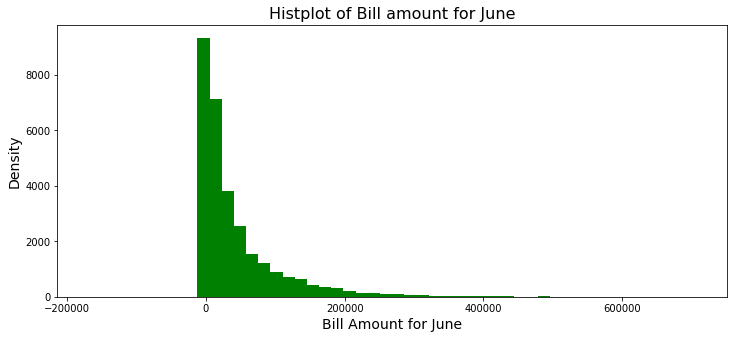

In [ ]:
#Bill amount for June
plt.figure(figsize=(12,5))
data['BILL_AMT4'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for June', size=16)
plt.xlabel('Bill Amount for June', size=14)
plt.ylabel('Density', size=14)
plt.show()

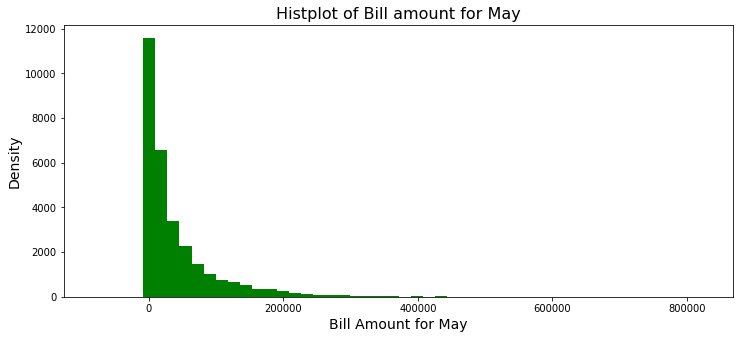

In [ ]:
#Bill amount for May
plt.figure(figsize=(12,5))
data['BILL_AMT5'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for May', size=16)
plt.xlabel('Bill Amount for May', size=14)
plt.ylabel('Density', size=14)
plt.show()

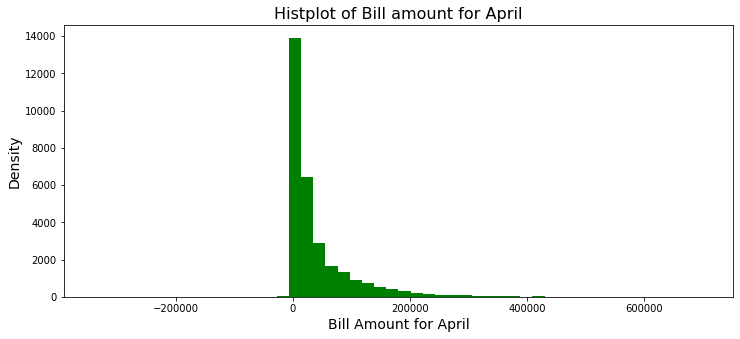

In [ ]:
#Bill amount for April
plt.figure(figsize=(12,5))
data['BILL_AMT6'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for April', size=16)
plt.xlabel('Bill Amount for April', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Visualization of Bill Amount**

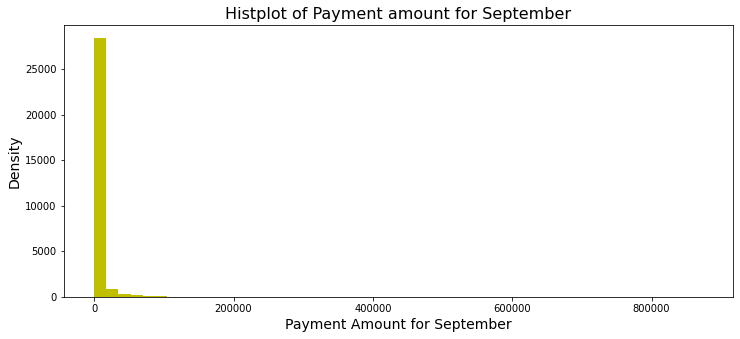

In [ ]:
#list of payment amounts available in the dataset
bill_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Payment amount for September
plt.figure(figsize=(12,5))
data['PAY_AMT1'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for September', size=16)
plt.xlabel('Payment Amount for September', size=14)
plt.ylabel('Density', size=14)
plt.show()

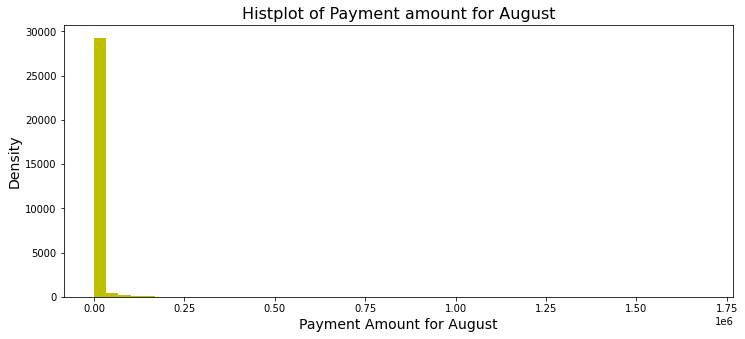

In [ ]:
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT2'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for August', size=16)
plt.xlabel('Payment Amount for August', size=14)
plt.ylabel('Density', size=14)
plt.show()

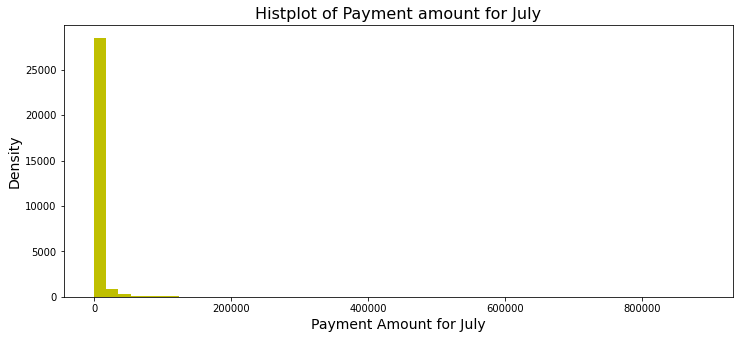

In [ ]:
#Payment amount for July
plt.figure(figsize=(12,5))
data['PAY_AMT3'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for July', size=16)
plt.xlabel('Payment Amount for July', size=14)
plt.ylabel('Density', size=14)
plt.show()

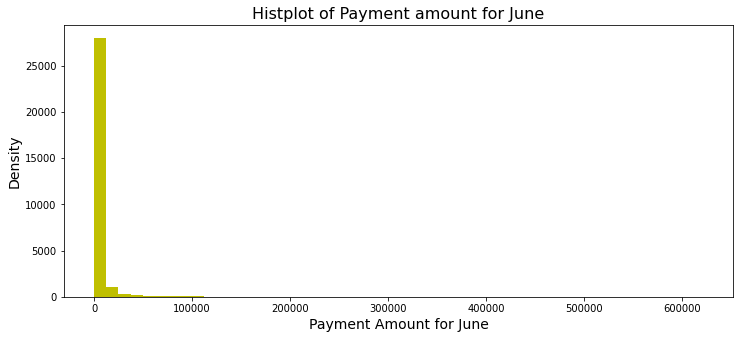

In [ ]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT4'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for June', size=16)
plt.xlabel('Payment Amount for June', size=14)
plt.ylabel('Density', size=14)
plt.show()

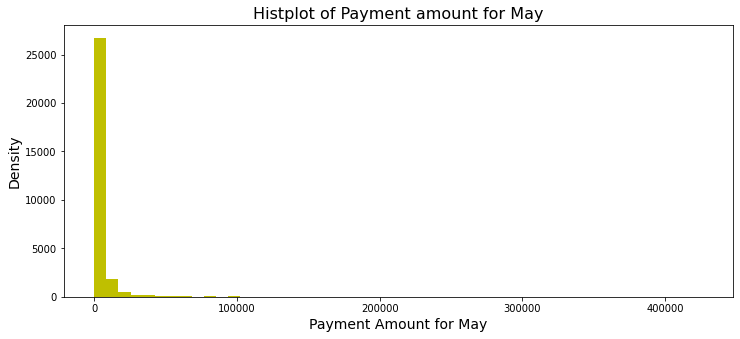

In [ ]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT5'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for May', size=16)
plt.xlabel('Payment Amount for May', size=14)
plt.ylabel('Density', size=14)
plt.show()

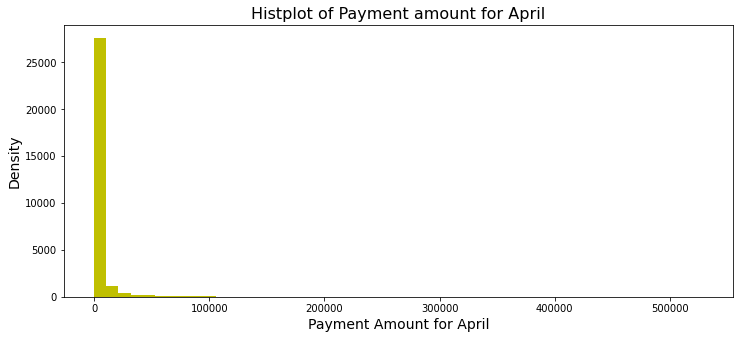

In [ ]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT6'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for April', size=16)
plt.xlabel('Payment Amount for April', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Conversion of features**

In [ ]:
#converting the datatype of the features
features = data.columns

for col in features:
    data[col] = data[col].astype(int)

* All the columns  of  int and float by the datatype is showing as object so, these are converted into numerical features

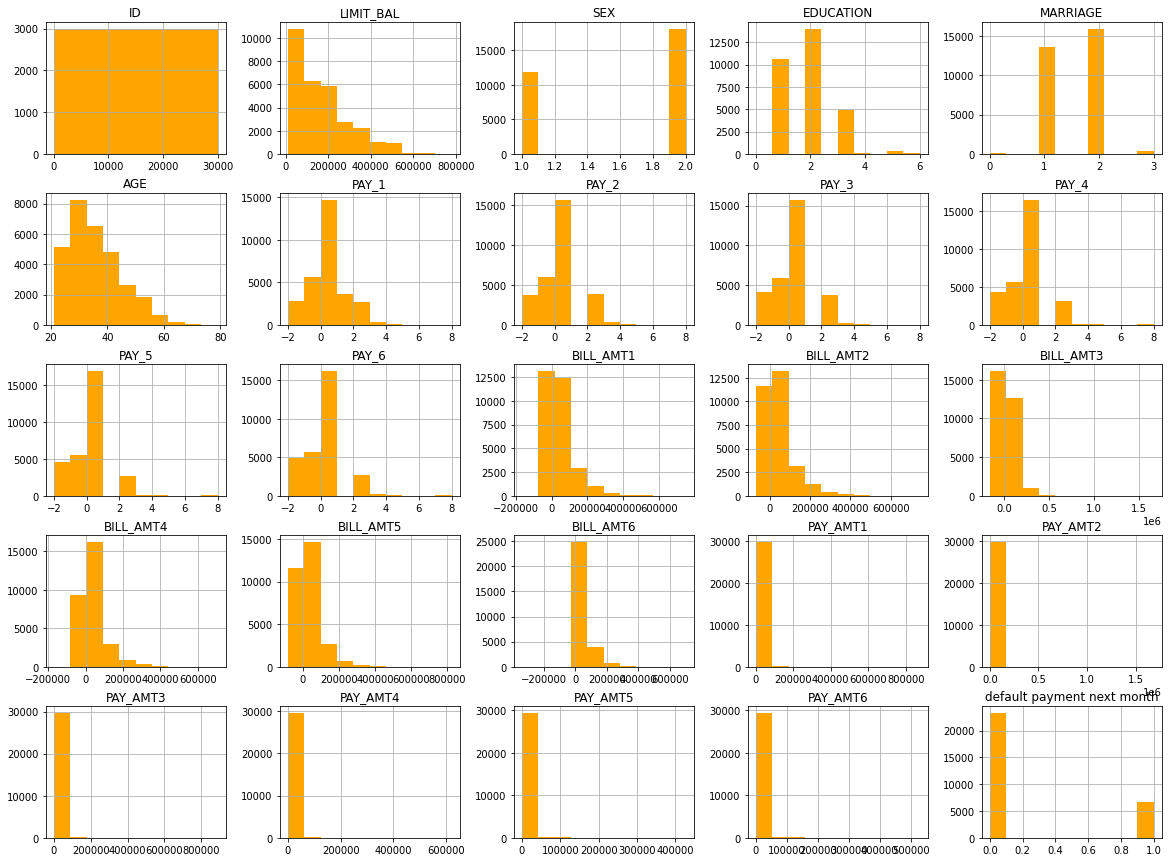

In [ ]:
data.hist(figsize=(20,15), color='orange')
plt.show()

* The above histplot of dataset shows the scatterness and density of each column.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,29997.0,15000.829250,8660.498565,1.0,7501.0,15001.0,22501.0,30000.0
LIMIT_BAL,29997.0,167414.397440,129562.160144,10000.0,50000.0,140000.0,240000.0,780000.0
SEX,29997.0,1.603760,0.489123,1.0,1.0,2.0,2.0,2.0
EDUCATION,29997.0,1.853185,0.790357,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29997.0,1.551889,0.521970,0.0,1.0,2.0,2.0,3.0
AGE,29997.0,35.484182,9.217371,21.0,28.0,34.0,41.0,79.0
PAY_1,29997.0,-0.016602,1.123785,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29997.0,-0.133680,1.197187,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29997.0,-0.166117,1.196871,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29997.0,-0.220622,1.169179,-2.0,-1.0,0.0,0.0,8.0


# **Data Preparation**

**Correlation**

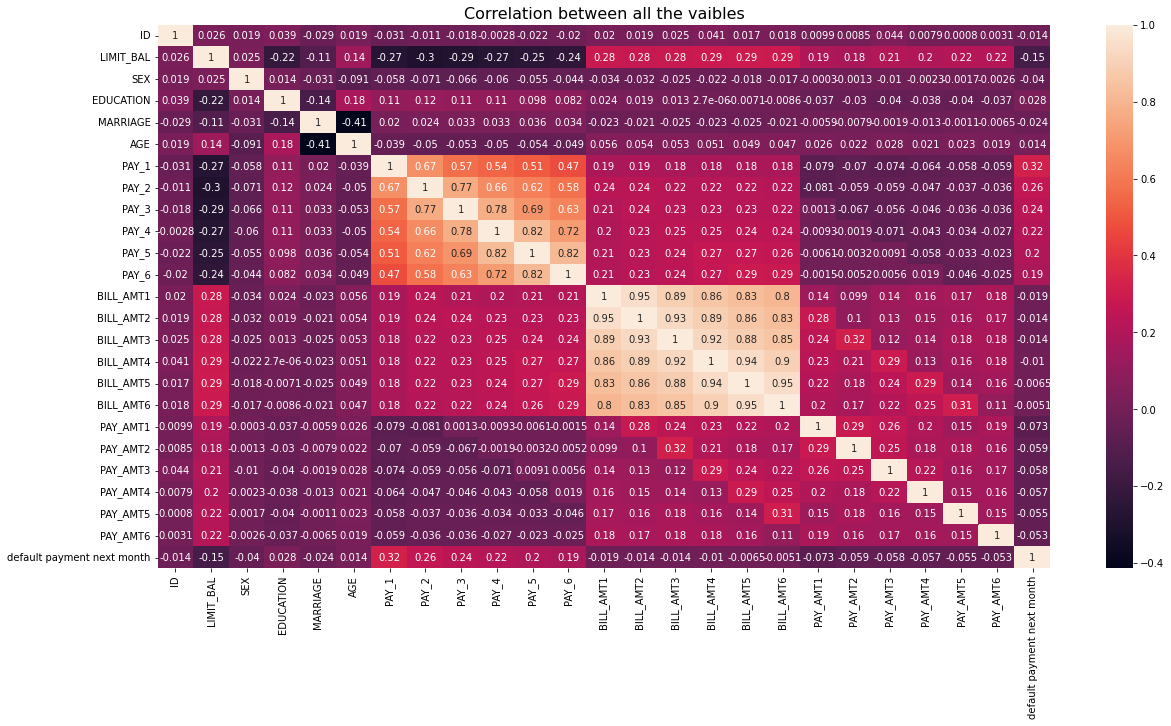

In [ ]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Checking for Multicorrelation**

In [ ]:
#importing the library required for calculating the variance
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function to calculate the variance inflation factor
def cal_vif(X):
    #dataframe for vif
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [ ]:
#dataframe showing the calculated vif
cal_vif(data[[i for i in data.describe().columns if i not in ['ID']]])

,Variables,VIF
0,LIMIT_BAL,4.038583
1,SEX,9.106821
2,EDUCATION,6.731309
3,MARRIAGE,6.287784
4,AGE,11.050229
5,PAY_1,1.996378
6,PAY_2,3.215122
7,PAY_3,3.728632
8,PAY_4,4.445212
9,PAY_5,4.988679


In [ ]:
#dataframe showing the calculated vif
cal_vif(data[[i for i in data.describe().columns if i not in ['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]])

,Variables,VIF
0,LIMIT_BAL,3.542744
1,SEX,9.091177
2,EDUCATION,6.687044
3,MARRIAGE,6.280219
4,AGE,11.041650
5,PAY_1,1.980320
6,PAY_2,3.162289
7,PAY_3,3.704399
8,PAY_4,4.428364
9,PAY_5,4.963369


* All BILL_AMT features have negative correlation among them, they are dropped.

**Dependent and Independent Variables**

In [ ]:
#defining the dependent and independent variables
dependent_variable = 'default payment next month'
'''independent_variables = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 
                         'PAY_6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']'''

independent_variables = data.columns[1:-1]

In [ ]:
independent_variables 

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

**Defining the X and y variables**

In [ ]:
#defining the x and y variables
y = data[dependent_variable]
X = data[independent_variables]

# **Model Implementation**

**Libraries required for Model**

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate 

**Train and Test data sets**

In [ ]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (23997, 23)
Size of X_test is: (6000, 23)
Size of y_train is: (23997,)
Size of y_test is: (6000,)


**Scaling the data**

In [ ]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [ ]:
#Creating the Logistic regression object
regressor = LogisticRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

#defining the predicted variable
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)

In [ ]:
#libraries required for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

**Model Evaluation**

In [ ]:
#Accuracy Test
accuracy = accuracy_score(y_train,pred_train)
accuracy

0.8107263407925991

In [ ]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.8096666666666666

**Confusion Matrix**

[[18215   499]
 [ 4043  1240]]


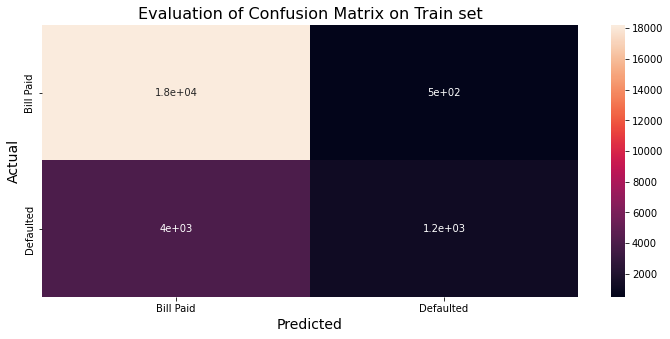

In [ ]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_train, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**Classification Report**

In [ ]:
#classification report of train set
print("Classification Report:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report:


              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18714
           1       0.71      0.23      0.35      5283

    accuracy                           0.81     23997
   macro avg       0.77      0.60      0.62     23997
weighted avg       0.80      0.81      0.77     23997



[[4523  124]
 [1018  335]]


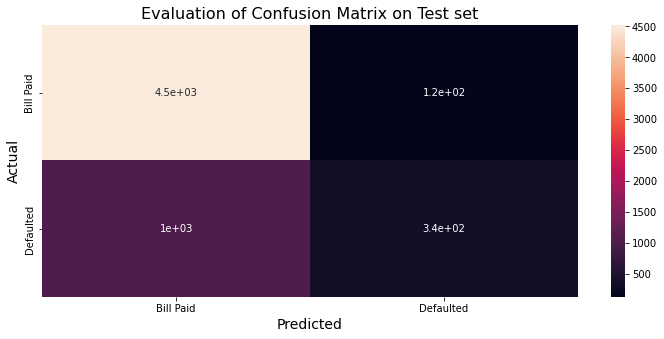

In [ ]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
#classification report of test set
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4647
           1       0.73      0.25      0.37      1353

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000



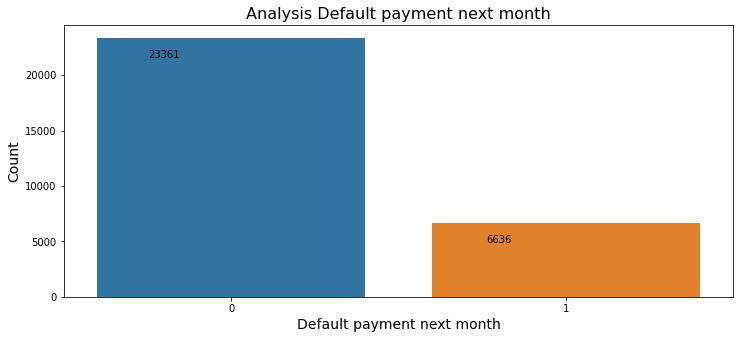

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, x='default payment next month')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.title('Analysis Default payment next month', size=16)
plt.xlabel('Default payment next month', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['default payment next month'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29997
Resampled dataset shape 46722


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46717,3828,20000,1,1,1,31,1,1,1,1,1,1,11397,14337,11472,11637,7775,7755,5904,59,773,0,605,0
46718,22150,134961,2,4,1,51,2,2,1,1,0,0,112822,109460,115366,114909,115692,118278,0,8483,2977,4247,4600,4428
46719,14673,210000,1,1,1,48,-1,-1,-1,-1,-1,-1,379,379,379,379,379,177,379,379,379,379,177,709
46720,9790,200000,1,2,1,59,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = list(data.columns)

In [ ]:
columns.pop()

'default payment next month'

In [ ]:
final_df = pd.DataFrame(x_smote, columns=columns)
final_df['IsDefaulter'] = y_smote
final_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
final_df.shape

(46722, 25)

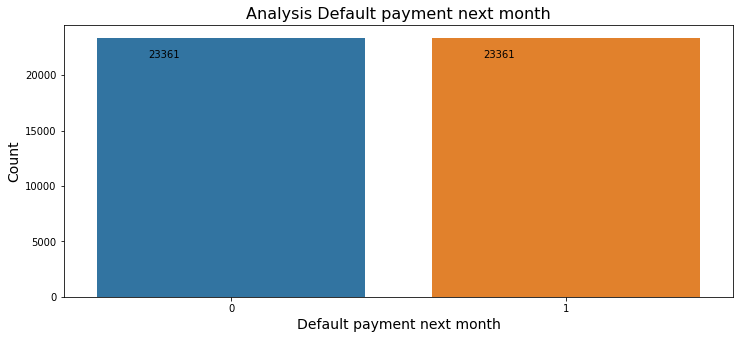

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=final_df, x='IsDefaulter')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.title('Analysis Default payment next month', size=16)
plt.xlabel('Default payment next month', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [ ]:
#defining the dependent and independent variables
dependent_variable = 'IsDefaulter'
independent_variables = independent_variables = final_df.columns[1:-1]
independent_variables

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
y = final_df[dependent_variable]
X = final_df[independent_variables]

In [ ]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (37377, 23)
Size of X_test is: (9345, 23)
Size of y_train is: (37377,)
Size of y_test is: (9345,)


In [ ]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Creating the Logistic regression object
regressor = LogisticRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

#defining the predicted variable
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)

In [ ]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.7225254146602461

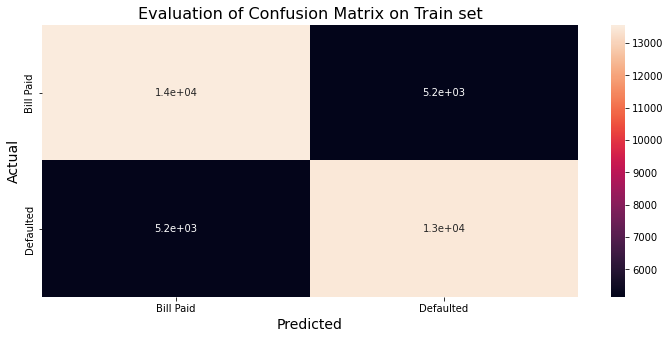

In [ ]:
cm_test = confusion_matrix(y_train, pred_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

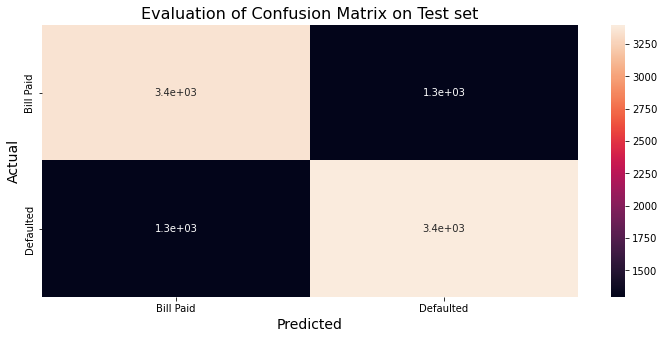

In [ ]:
cm_test = confusion_matrix(y_test, pred_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4651
           1       0.72      0.72      0.72      4694

    accuracy                           0.72      9345
   macro avg       0.72      0.72      0.72      9345
weighted avg       0.72      0.72      0.72      9345



# **Cross Validation on Logistic Regression**

In [ ]:
scoring = ['accuracy']
scores = cross_validate(regressor, X_train, y_train, scoring=scoring, cv=5,
                         return_train_score = True, return_estimator = True, verbose=10)

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................ accuracy: (train=0.723, test=0.719) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................ accuracy: (train=0.724, test=0.717) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ................ accuracy: (train=0.722, test=0.728) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] END ................ accuracy: (train=0.723, test=0.725) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] END ................ accuracy: (train=0.722, test=0.724) total time=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


In [ ]:
scores['train_accuracy']

array([0.7230193 , 0.72412294, 0.72185807, 0.72256036, 0.72249348])

In [ ]:
scores['test_accuracy']

array([0.71936865, 0.71655966, 0.72816054, 0.72468227, 0.72401338])

**Stocastic Gradient Desceant**

In [ ]:
#importing libraries
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# SGD Classifier implimentation
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
#Train the model with the training set
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
#defining the predict variable
pred_test = sgd.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.720920278223649

In [ ]:
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.73      0.70      0.71      4651
           1       0.71      0.75      0.73      4694

    accuracy                           0.72      9345
   macro avg       0.72      0.72      0.72      9345
weighted avg       0.72      0.72      0.72      9345



# **K Near Neighbor Classifier**

In [ ]:
#new dataframe with selected features
df = final_df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'IsDefaulter']]

df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


In [ ]:
#libraries required for knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
#scalling the data
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df.drop('IsDefaulter', axis=1))

In [ ]:
#data frame of scaled data
data_feat = pd.DataFrame(scaled_data, columns=df.columns[:-1])
data_feat.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.986901,0.320675,-0.880570,-1.299307,1.631853,1.625292,-0.817959,-0.772168,-1.605209,-1.562732,-0.335042,-0.216490,-0.294480,-0.295261,-0.299926,-0.283311
1,0.986901,0.320675,1.063942,-1.072394,-1.045485,1.625292,0.012387,0.062374,0.104901,1.830307,-0.335042,-0.200246,-0.227376,-0.223938,-0.299926,-0.155321
2,0.986901,0.320675,1.063942,-0.164741,-0.153039,-0.029413,0.012387,0.062374,0.104901,0.133788,-0.227575,-0.174131,-0.227376,-0.223938,-0.226801,0.036663
3,0.986901,0.320675,-0.880570,0.175629,-0.153039,-0.029413,0.012387,0.062374,0.104901,0.133788,-0.193451,-0.147023,-0.213955,-0.216805,-0.221756,-0.219316
4,-1.013272,0.320675,-0.880570,2.444762,-1.045485,-0.029413,-0.817959,0.062374,0.104901,0.133788,-0.193451,1.663396,0.376560,0.346650,-0.249543,-0.239859


In [ ]:
#implementing the knn classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#defining the predicted variable
pred_test = knn.predict(X_test)

In [ ]:
#classification report of test set
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.79      0.73      0.75      4651
           1       0.75      0.80      0.77      4694

    accuracy                           0.76      9345
   macro avg       0.77      0.76      0.76      9345
weighted avg       0.77      0.76      0.76      9345



**Finding the best K value**

In [ ]:
#list of accuracy rate in knn
accuracy_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, final_df['IsDefaulter'], cv=10)
    accuracy_rate.append(score.mean())

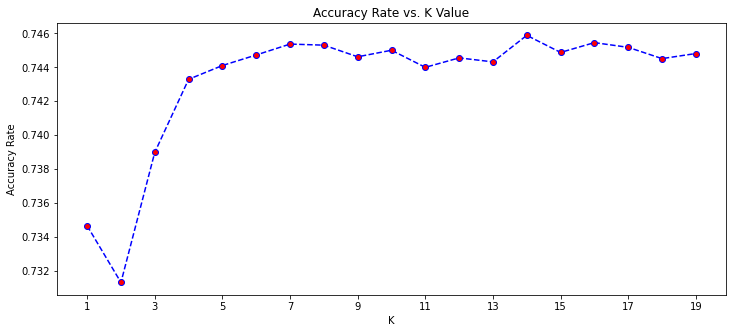

In [ ]:
#plotting the values of accurary rate
plt.figure(figsize=(12,5))
plt.plot(range(1, 20), accuracy_rate, 'b--', marker='o', markerfacecolor='red')
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 20, 2))
plt.ylabel('Accuracy Rate')
plt.show()

k at 14 is considered as the best value, as it have the good accuracy rate

In [ ]:
#lisst of error rate
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, df['IsDefaulter'], cv=10)
    error_rate.append(1-(score.mean()))

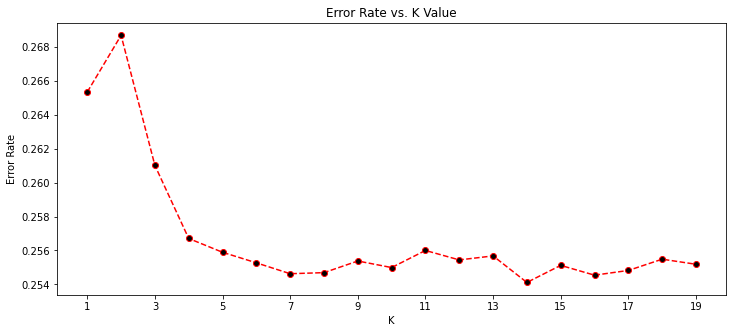

In [ ]:
#plotting the list of error rate
plt.figure(figsize=(12,5))
plt.plot(range(1, 20), error_rate, 'r--', marker = 'o', markerfacecolor='k')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 20, 2))
plt.ylabel('Error Rate')
plt.show()

k at 14 shows the low rate of error, even though it goes down after that when we compare it with the accuracy at same point that's better to consider the k value at 14. But as a thumb rule our K value should not be even. So I choose 15 as my K value.

In [ ]:
#impleting the knn classifier with k = 15
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
#defining the predicted variable
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

**Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.7562332798287854

In [ ]:
#classification report of train set
print("Classification Report:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report:


              precision    recall  f1-score   support

           0       0.78      0.79      0.79     18710
           1       0.79      0.78      0.78     18667

    accuracy                           0.78     37377
   macro avg       0.78      0.78      0.78     37377
weighted avg       0.78      0.78      0.78     37377



In [ ]:
#classification report of testset
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.75      0.76      0.76      4651
           1       0.76      0.75      0.76      4694

    accuracy                           0.76      9345
   macro avg       0.76      0.76      0.76      9345
weighted avg       0.76      0.76      0.76      9345



[[14738  3972]
 [ 4075 14592]]


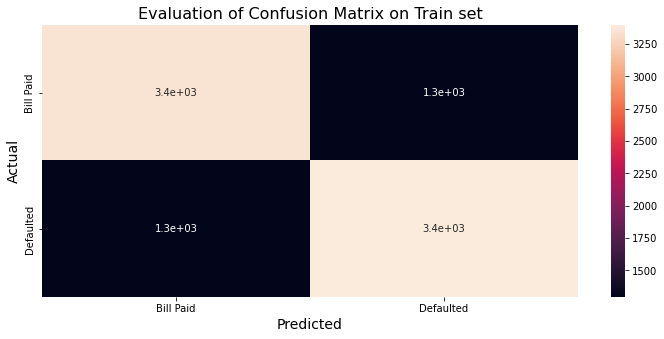

In [ ]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[3542 1109]
 [1169 3525]]


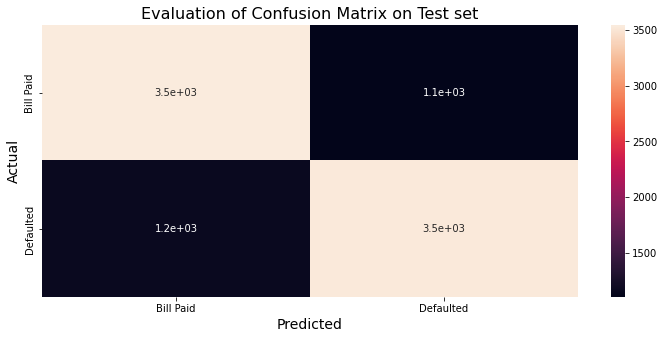

In [ ]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Random Forest Classifier**

In [ ]:
#defining the dependent and independent variables
dependent_variable = 'IsDefaulter'
independent_variables = independent_variables = final_df.columns[1:-1]
independent_variables

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
y = final_df[dependent_variable]
X = final_df[independent_variables]

In [ ]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (37377, 23)
Size of X_test is: (9345, 23)
Size of y_train is: (37377,)
Size of y_test is: (9345,)


In [ ]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#library required for the random forest
from sklearn.ensemble import RandomForestClassifier

#implementing the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#defining the predicted variables
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

**Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.8401284109149277

In [ ]:
#classification report of train set
print("Classification Report on training data:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report on training data:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18710
           1       1.00      1.00      1.00     18667

    accuracy                           1.00     37377
   macro avg       1.00      1.00      1.00     37377
weighted avg       1.00      1.00      1.00     37377



In [ ]:
#classification report of test set
print("Classification Report on test data:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report on test data:


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4651
           1       0.86      0.82      0.84      4694

    accuracy                           0.84      9345
   macro avg       0.84      0.84      0.84      9345
weighted avg       0.84      0.84      0.84      9345



[[18698    12]
 [   12 18655]]


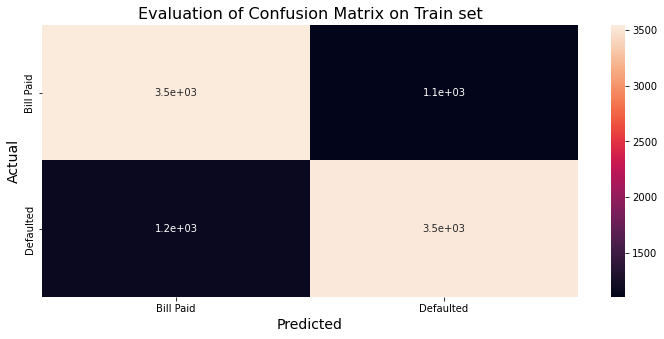

In [ ]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[4016  635]
 [ 859 3835]]


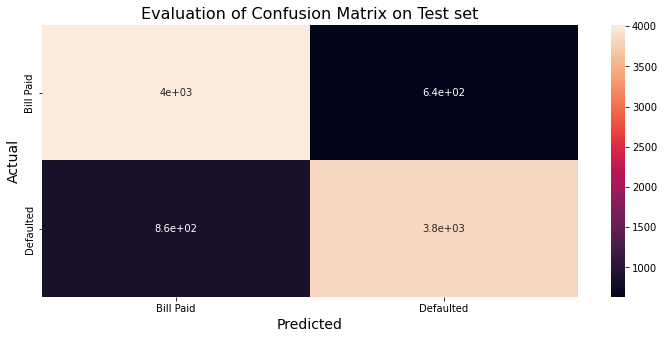

In [ ]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# Number of trees
n_estimators = [100,150]

# Maximum depth of trees
max_depth = [15]

# Minimum number of samples required to split a node
min_samples_split = [80, 90]

# Minimum number of samples required at each leaf node
min_samples_leaf = [25]


# HYperparameter Grid
params = {'n_estimators' : n_estimators,
          'max_depth' : max_depth,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search
rf_grid = GridSearchCV(estimator=clf,param_grid = params,cv = 3, verbose=2,scoring="r2")

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=150; total time=   7.5s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=150; total time=   7.4s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=80, n_estimators=150; total time=   7.4s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=90, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=90, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=25, min_samples_split=90, n_estimators=100; total time=   4.9s
[CV] END max_

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15], 'min_samples_leaf': [25],
                         'min_samples_split': [80, 90],
                         'n_estimators': [100, 150]},
             scoring='r2', verbose=2)

In [ ]:
print(rf_grid.best_score_)

print(rf_grid.best_params_)

0.14289422521578787
{'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 80, 'n_estimators': 100}


In [ ]:
opt_clf = rf_grid.best_estimator_
#defining the predicted variables
pred_train = opt_clf.predict(X_train)
pred_test = opt_clf.predict(X_test)

In [ ]:
#classification report of train set
print("Classification Report on training data:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report on training data:


              precision    recall  f1-score   support

           0       0.80      0.86      0.83     18710
           1       0.85      0.78      0.81     18667

    accuracy                           0.82     37377
   macro avg       0.82      0.82      0.82     37377
weighted avg       0.82      0.82      0.82     37377



In [ ]:
#classification report of test set
print("Classification Report on test data:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report on test data:


              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4651
           1       0.82      0.75      0.78      4694

    accuracy                           0.79      9345
   macro avg       0.79      0.79      0.79      9345
weighted avg       0.79      0.79      0.79      9345



[[3880  771]
 [1174 3520]]


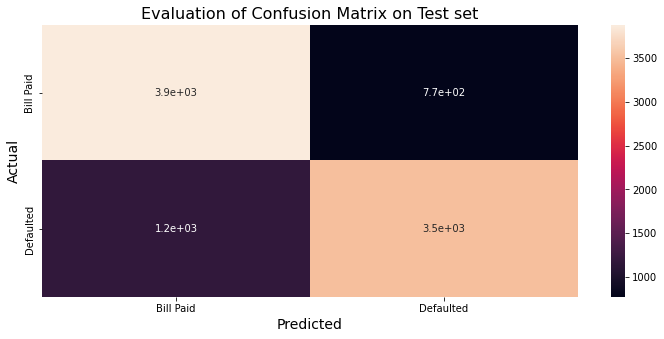

In [ ]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
clf.feature_importances_

array([0.05618733, 0.02913841, 0.02457442, 0.03123394, 0.05200241,
       0.07754987, 0.04908779, 0.04327386, 0.02658436, 0.02561839,
       0.0197635 , 0.05657342, 0.048817  , 0.04531294, 0.04368462,
       0.04301842, 0.04136452, 0.05725318, 0.0519605 , 0.04541384,
       0.04473632, 0.04180669, 0.0450443 ])

In [ ]:
importances = clf.feature_importances_

importance_dict = {'Feature' : list(final_df[independent_variables].columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

,Feature,Feature Importance
0,LIMIT_BAL,0.06
1,SEX,0.03
2,EDUCATION,0.02
3,MARRIAGE,0.03
4,AGE,0.05
5,PAY_1,0.08
6,PAY_2,0.05
7,PAY_3,0.04
8,PAY_4,0.03
9,PAY_5,0.03


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
5,PAY_1,0.08
0,LIMIT_BAL,0.06
17,PAY_AMT1,0.06
11,BILL_AMT1,0.06
4,AGE,0.05
12,BILL_AMT2,0.05
19,PAY_AMT3,0.05
18,PAY_AMT2,0.05
13,BILL_AMT3,0.05
6,PAY_2,0.05


**Conclusion**
* 500000 is the highest limit balance and 327680 is the least one.
* We have more number of defaulters from female customers.
* In both married and singles the defaulters are equal in number.
* Coming to education, the university category customers are high in number as well as in defaulting.
* We have customers from 21 to 79 age group. Customers of 29 age are more in number but there is no much difference in the age criterion in defaulting.
* Some of the bill amount histplot are extended towards the left it is assumed that there are some advance payments.

The models accuracy of predicting the customer will pay the next month credit card due or not on the test data. Logistic Regression have the accuracy of 81.65% and the f1score was 0.34 which says not a good score atall.

SMOTE oversampling technique was used to balance the data.


After balancing the data the models accuracy of predicting the customer will pay the next month credit card due or not on the test data.

Logistic Regression have the accuracy of 72.85%.

Stocastic Gradient Desceant have the accuracy of 71.32%

K Near Neighbor have the accuracy of 75.00%.


Random Forest have the accuracy of 86.00%

 
From the above evaluation it is better to train the model with Random Forest Classifier which have 82.00% of accuracy on test data.